## P2 - Inteligencia Artificial
### Algoritmo Hill-Climbing

##### David Marques e Gabriel Calil


------------------------------------------------------------

# Estrutura de Pessoas e Habilidades

O código utiliza uma estrutura simples para representar pessoas e suas habilidades. Cada pessoa possui um identificador único (`id`) e um valor associado (`valor`), que representa a "habilidade" ou "pontuação" dessa pessoa.

## Estrutura de Dados

As pessoas são armazenadas em uma lista, onde cada pessoa é representada por um dicionário. Aqui está um exemplo de como a lista de pessoas é estruturada:

```python
pessoas = [
    {"id": 1, "valor": 85},
    {"id": 2, "valor": 67},
    {"id": 3, "valor": 42},
    {"id": 4, "valor": 93},
    {"id": 5, "valor": 58},
    # ... até o número total de pessoas definido no código
]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random


In [ ]:
# Dados iniciais
num_pessoas = 500
num_equipes = 5

# Gerar os dados das pessoas com valores aleatórios
pessoas = [{"id": i, "valor": random.randint(1, 100)} for i in range(1, num_pessoas + 1)]


In [ ]:
# Função de avaliação (Fitness): Soma os valores dentro de cada equipe e calcula o desvio padrão
def avaliar_solucao(solucao):
    valores_por_equipe = [sum(p["valor"] for p in equipe) for equipe in solucao]
    return np.std(valores_por_equipe)

# Gera uma solução inicial aleatória
def gerar_solucao_inicial(pessoas, num_equipes):
    solucao = [[] for _ in range(num_equipes)]
    for pessoa in pessoas:
        equipe_aleatoria = random.randint(0, num_equipes - 1)
        solucao[equipe_aleatoria].append(pessoa)
    return solucao

# Gera um vizinho a partir da solução atual
def gerar_vizinho(solucao):
    nova_solucao = [equipe[:] for equipe in solucao]  # Faz uma cópia da solução
    equipe_origem = random.choice([i for i in range(len(nova_solucao)) if len(nova_solucao[i]) > 0])

    # Garante que a equipe de origem tenha pelo menos uma pessoa
    if len(nova_solucao[equipe_origem]) == 0:
        return nova_solucao

    pessoa = random.choice(nova_solucao[equipe_origem])
    nova_solucao[equipe_origem].remove(pessoa)
    equipe_destino = random.choice(range(len(nova_solucao)))
    nova_solucao[equipe_destino].append(pessoa)
    return nova_solucao


In [ ]:
def hill_climbing_complexo(pessoas, num_equipes, max_iter, max_restarts):
    melhor_solucao_global = None
    melhor_fitness_global = float('inf')
    historico_fitness = []
    historico_restarts = []

    for restart in range(max_restarts):
        solucao_atual = gerar_solucao_inicial(pessoas, num_equipes)
        fitness_atual = avaliar_solucao(solucao_atual)

        for iteracao in range(max_iter):
            nova_solucao = gerar_vizinho(solucao_atual)
            fitness_novo = avaliar_solucao(nova_solucao)

            if fitness_novo < fitness_atual:
                solucao_atual = nova_solucao
                fitness_atual = fitness_novo

            historico_fitness.append(fitness_atual)

        # Atualiza o melhor global se necessário
        if fitness_atual < melhor_fitness_global:
            melhor_solucao_global = solucao_atual
            melhor_fitness_global = fitness_atual

        historico_restarts.append(fitness_atual)

    return melhor_solucao_global, melhor_fitness_global, {
        "fitness_historico": historico_fitness,
        "fitness_restarts": historico_restarts,
    }


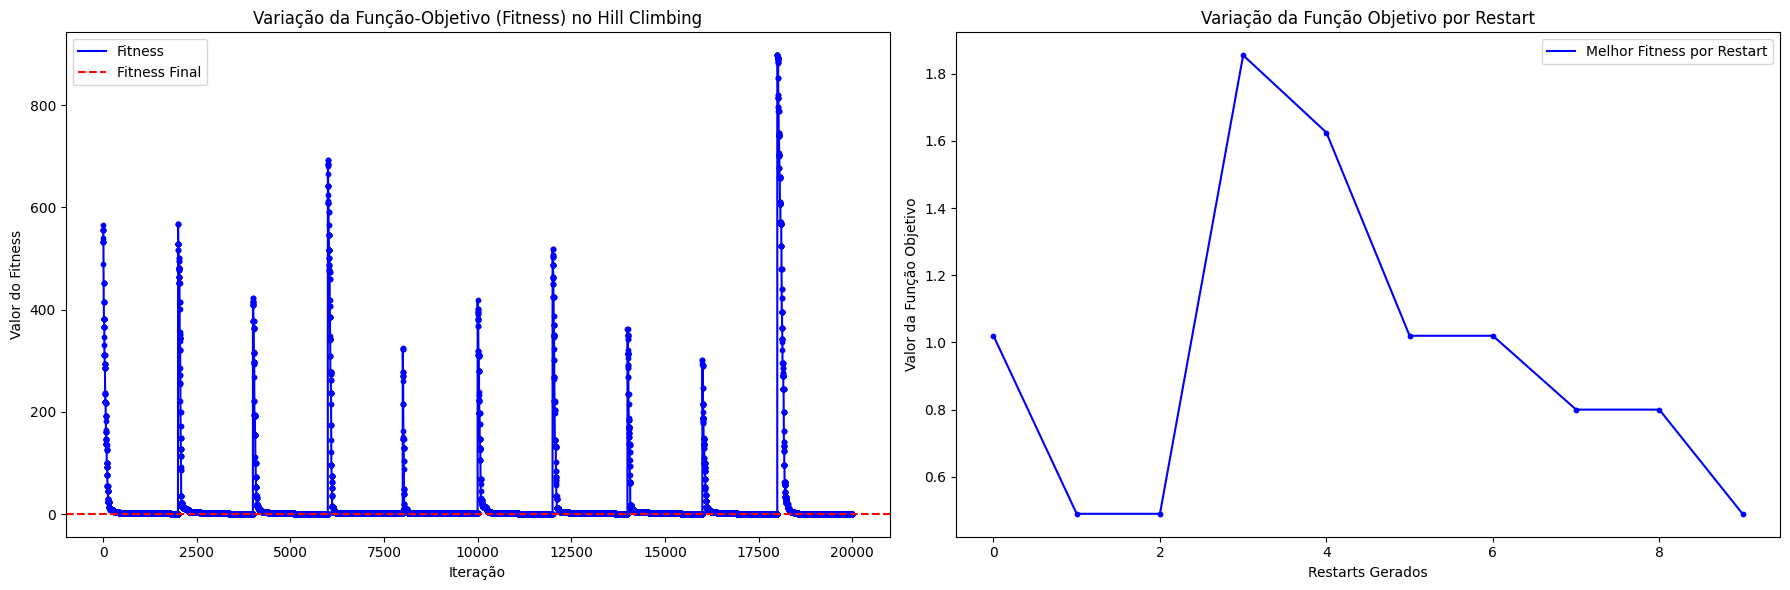

In [ ]:
# Executa o algoritmo com reinicializações e parâmetros configurados
melhor_solucao, melhor_fitness, historico = hill_climbing_complexo(
    pessoas=pessoas,
    num_equipes=num_equipes,
    max_iter=2000,              # Número máximo de iterações por reinicialização
    max_restarts=10             # Número máximo de reinicializações
)

# Dados para os gráficos
fitness_historico = historico["fitness_historico"]
fitness_restarts = historico["fitness_restarts"]

# Visualização da evolução do Fitness
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico: Fitness ao longo das iterações
axes[0].plot(range(len(fitness_historico)), fitness_historico, 'b-', label="Fitness")
axes[0].scatter(range(len(fitness_historico)), fitness_historico, c='blue', s=10)
axes[0].axhline(y=melhor_fitness, color='red', linestyle='--', label="Fitness Final")
axes[0].set_title("Variação da Função-Objetivo (Fitness) no Hill Climbing")
axes[0].set_xlabel("Iteração")
axes[0].set_ylabel("Valor do Fitness")
axes[0].legend()

# Gráfico: Fitness ao longo dos reinicializações
axes[1].plot(range(len(fitness_restarts)), fitness_restarts, 'b-', label="Melhor Fitness por Restart")
axes[1].scatter(range(len(fitness_restarts)), fitness_restarts, c='blue', s=10)
axes[1].set_title("Variação da Função Objetivo por Restart")
axes[1].set_xlabel("Restarts Gerados")
axes[1].set_ylabel("Valor da Função Objetivo")
axes[1].legend()

plt.tight_layout()
plt.show()
